In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\practice\dataset\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  S

In [ ]:
# Ensure 'date_added' is a string before stripping spaces
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert to datetime format, handling errors gracefully
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Verify conversion success
df[['date_added']].head()

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24


In [13]:
# Fill missing values in 'country' with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15648\689190884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [14]:
# Extract numeric values from 'duration' column for Movies
df['duration'] = df['duration'].str.extract('(\d+)')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_15648\2455518033.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration'] = df['duration'].str.extract('(\d+)')


Plot the distribution of Movies vs TV Shows

C:\Users\HP\AppData\Local\Temp\ipykernel_15648\2993542120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


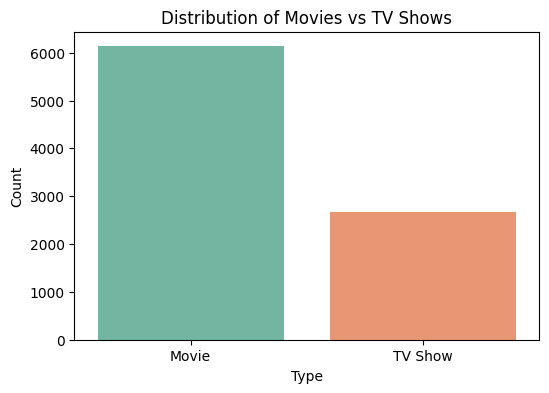

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

Top 10 countries with the most content

C:\Users\HP\AppData\Local\Temp\ipykernel_15648\982989902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


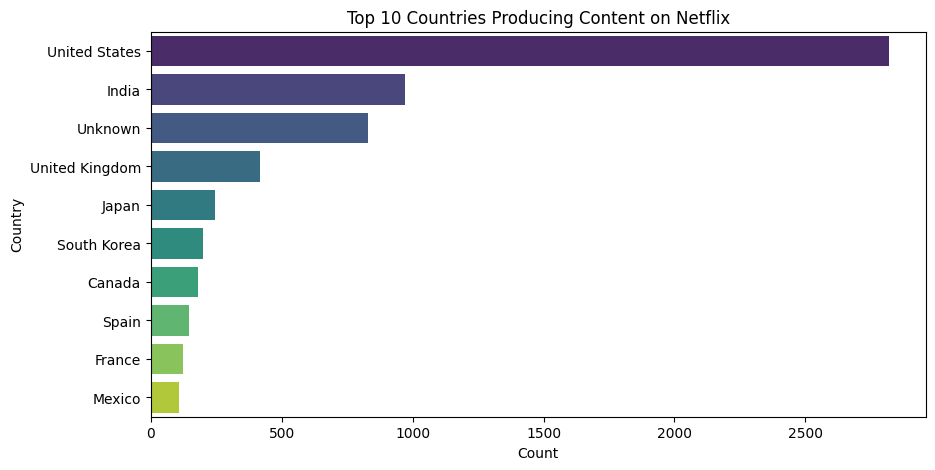

In [18]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries Producing Content on Netflix")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

Extract year from 'date_added' and count occurrences

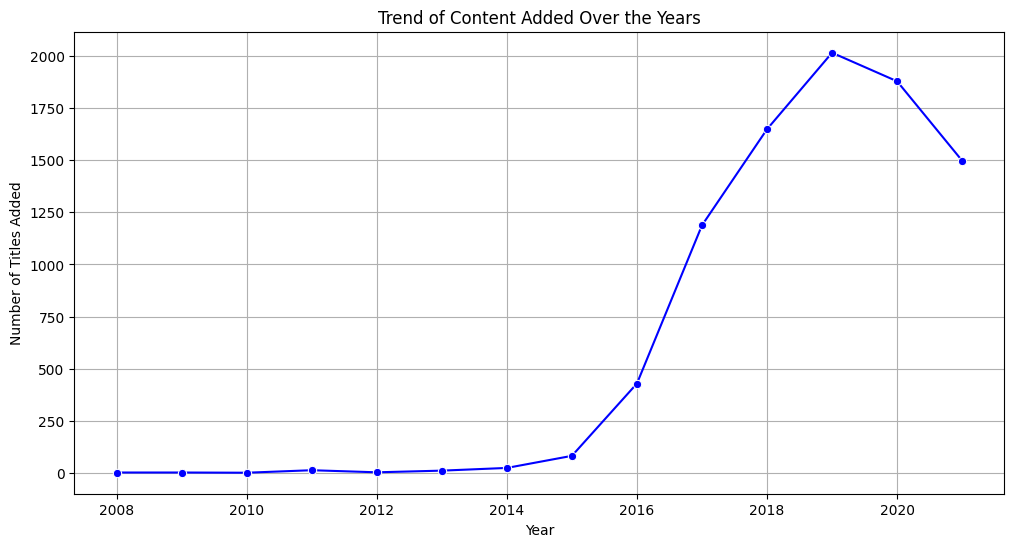

In [20]:
df['year_added'] = df['date_added'].dt.year
content_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=content_trend.index, y=content_trend.values, marker="o", color="b")
plt.title("Trend of Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()


Filter only Movies and analyze duration distribution

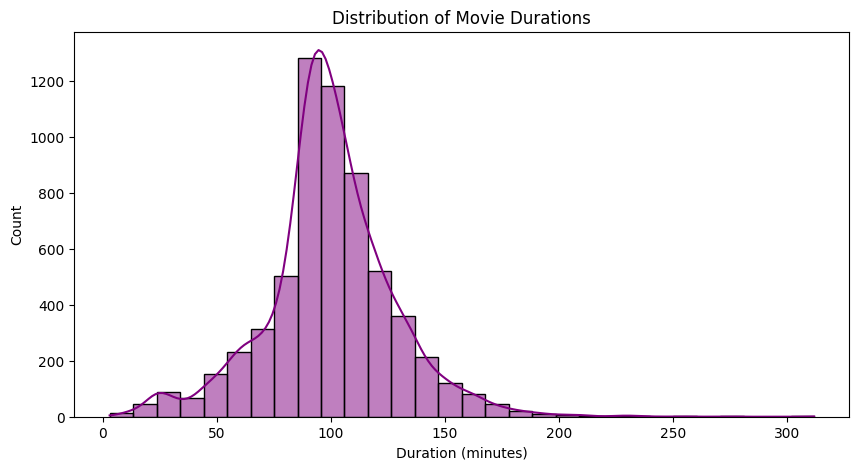

In [ ]:
movie_durations = df[df["type"] == "Movie"]["duration"].dropna()

plt.figure(figsize=(10, 5))
sns.histplot(movie_durations, bins=30, kde=True, color="purple")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

most common genres on Netflix, with dramas, comedies, and documentaries being the most prevalent.

C:\Users\HP\AppData\Local\Temp\ipykernel_15648\1463450149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df["Count"], y=genre_df["Genre"], palette="coolwarm")


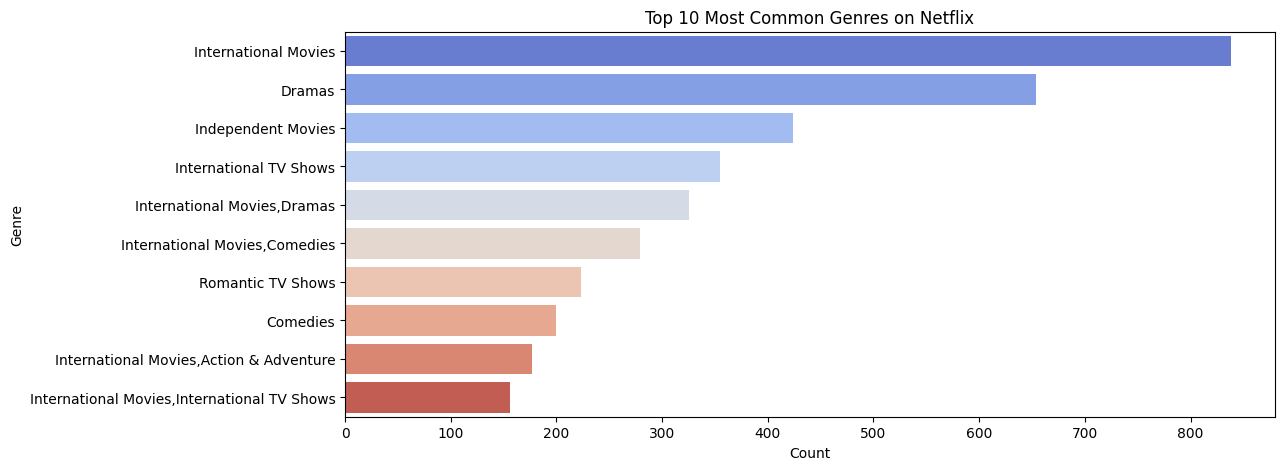

In [27]:
# Split and count genres (listed_in column)
all_genres = ",".join(df["listed_in"]).split(", ")
genre_counts = Counter(all_genres).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=["Genre", "Count"])

plt.figure(figsize=(12, 5))
sns.barplot(x=genre_df["Count"], y=genre_df["Genre"], palette="coolwarm")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()